# AIRBNB FORECAST 

# Forecasting the Airbnb data

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_excel('Airbnb_2019.xls')
data
data.columns = ['Month','Period','SALES']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head()

,Period,SALES
Month,,
2015-01-01,1,270696.374742
2015-02-01,2,277828.730583
2015-03-01,3,270668.066718
2015-04-01,4,260634.362865
2015-05-01,5,300135.351220


In [5]:
data = data.drop(columns=['Period'])
data.head()

,SALES
Month,
2015-01-01,270696.374742
2015-02-01,277828.730583
2015-03-01,270668.066718
2015-04-01,260634.362865
2015-05-01,300135.351220


In [6]:
data.info()
#Here we donot have to perform linear interpolation as we donot have missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SALES   60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


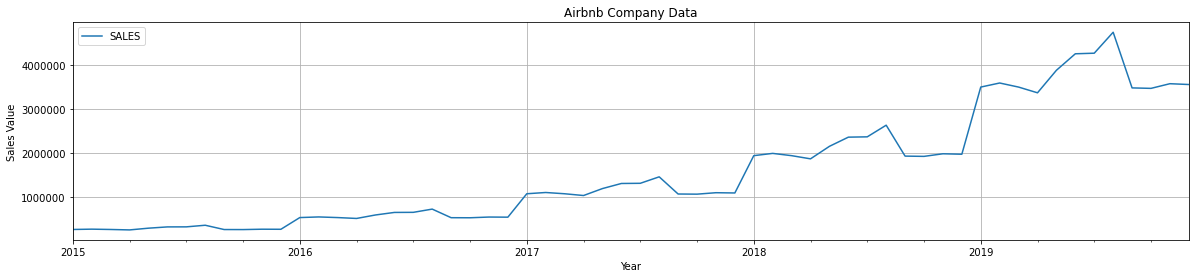

In [7]:
data.plot(figsize=(20, 4))
x_values = data.index.year
y_values = data['SALES']
plt.plot(x_values, y_values)
plt.grid()
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Sales Value')
plt.title('Airbnb Company Data')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.show(block=False)



In [8]:
#Trend - gradual increase over time 
#Linear interpolation - to replace the unknown values by assuming linear relationship with two nearby known values

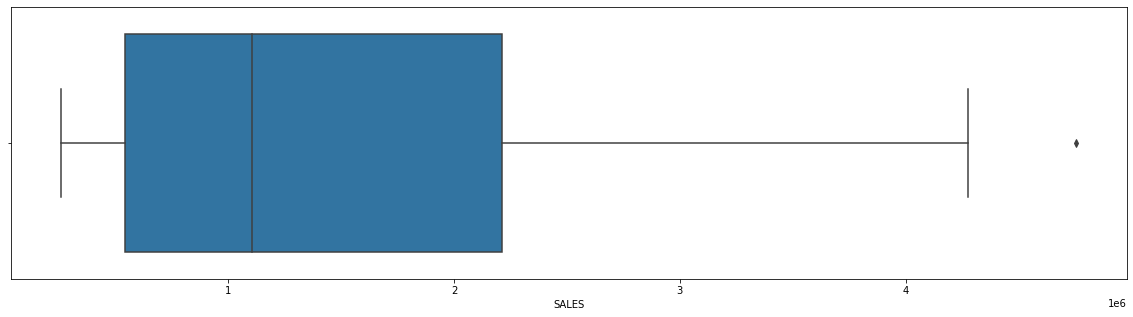

In [9]:
#Outlier detection
#Box plot and interquartile range

import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data['SALES'],whis=1.5)


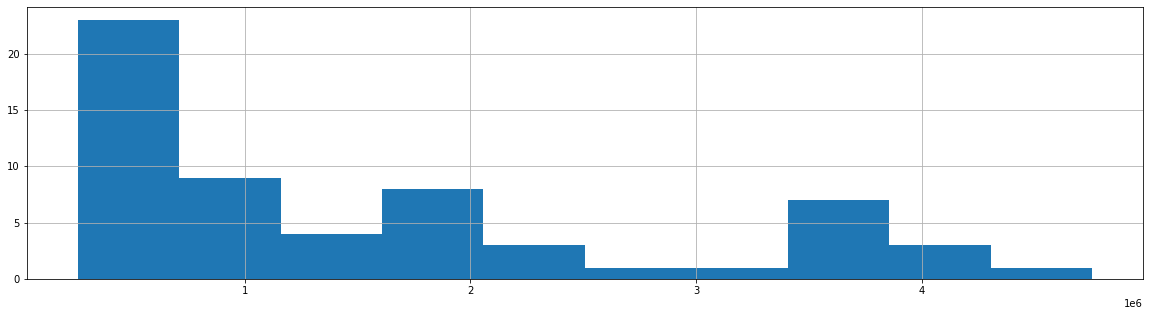

In [10]:
# Histogram plot

fig = data.SALES.hist(figsize = (20,5))


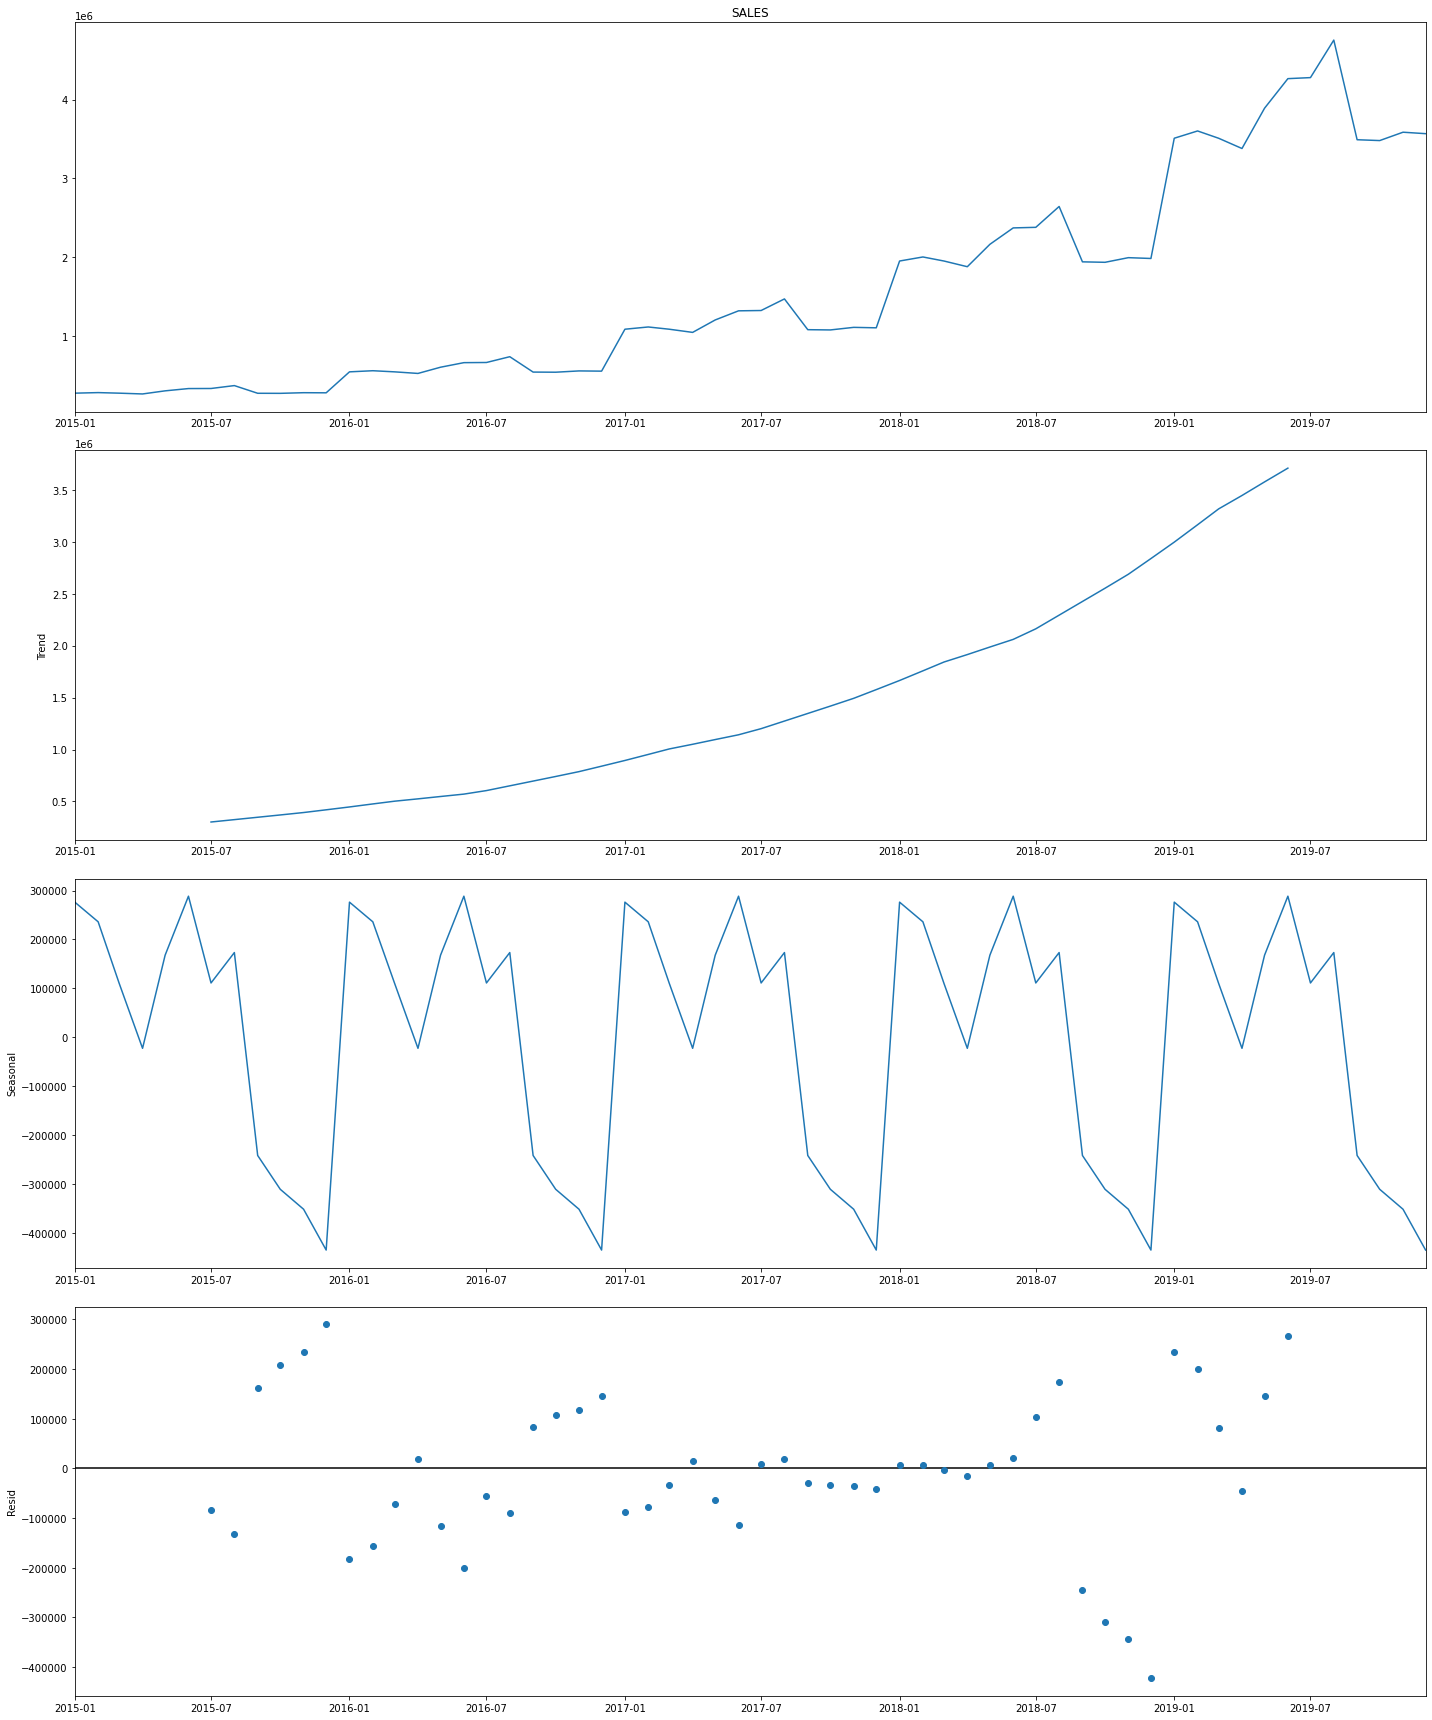

In [11]:
#Time series Decomposition
#Additive seasonal decomposition

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20,24
decomposition = sm.tsa.seasonal_decompose(data.SALES, model='additive') # additive seasonal index
fig = decomposition.plot()

plt.show()


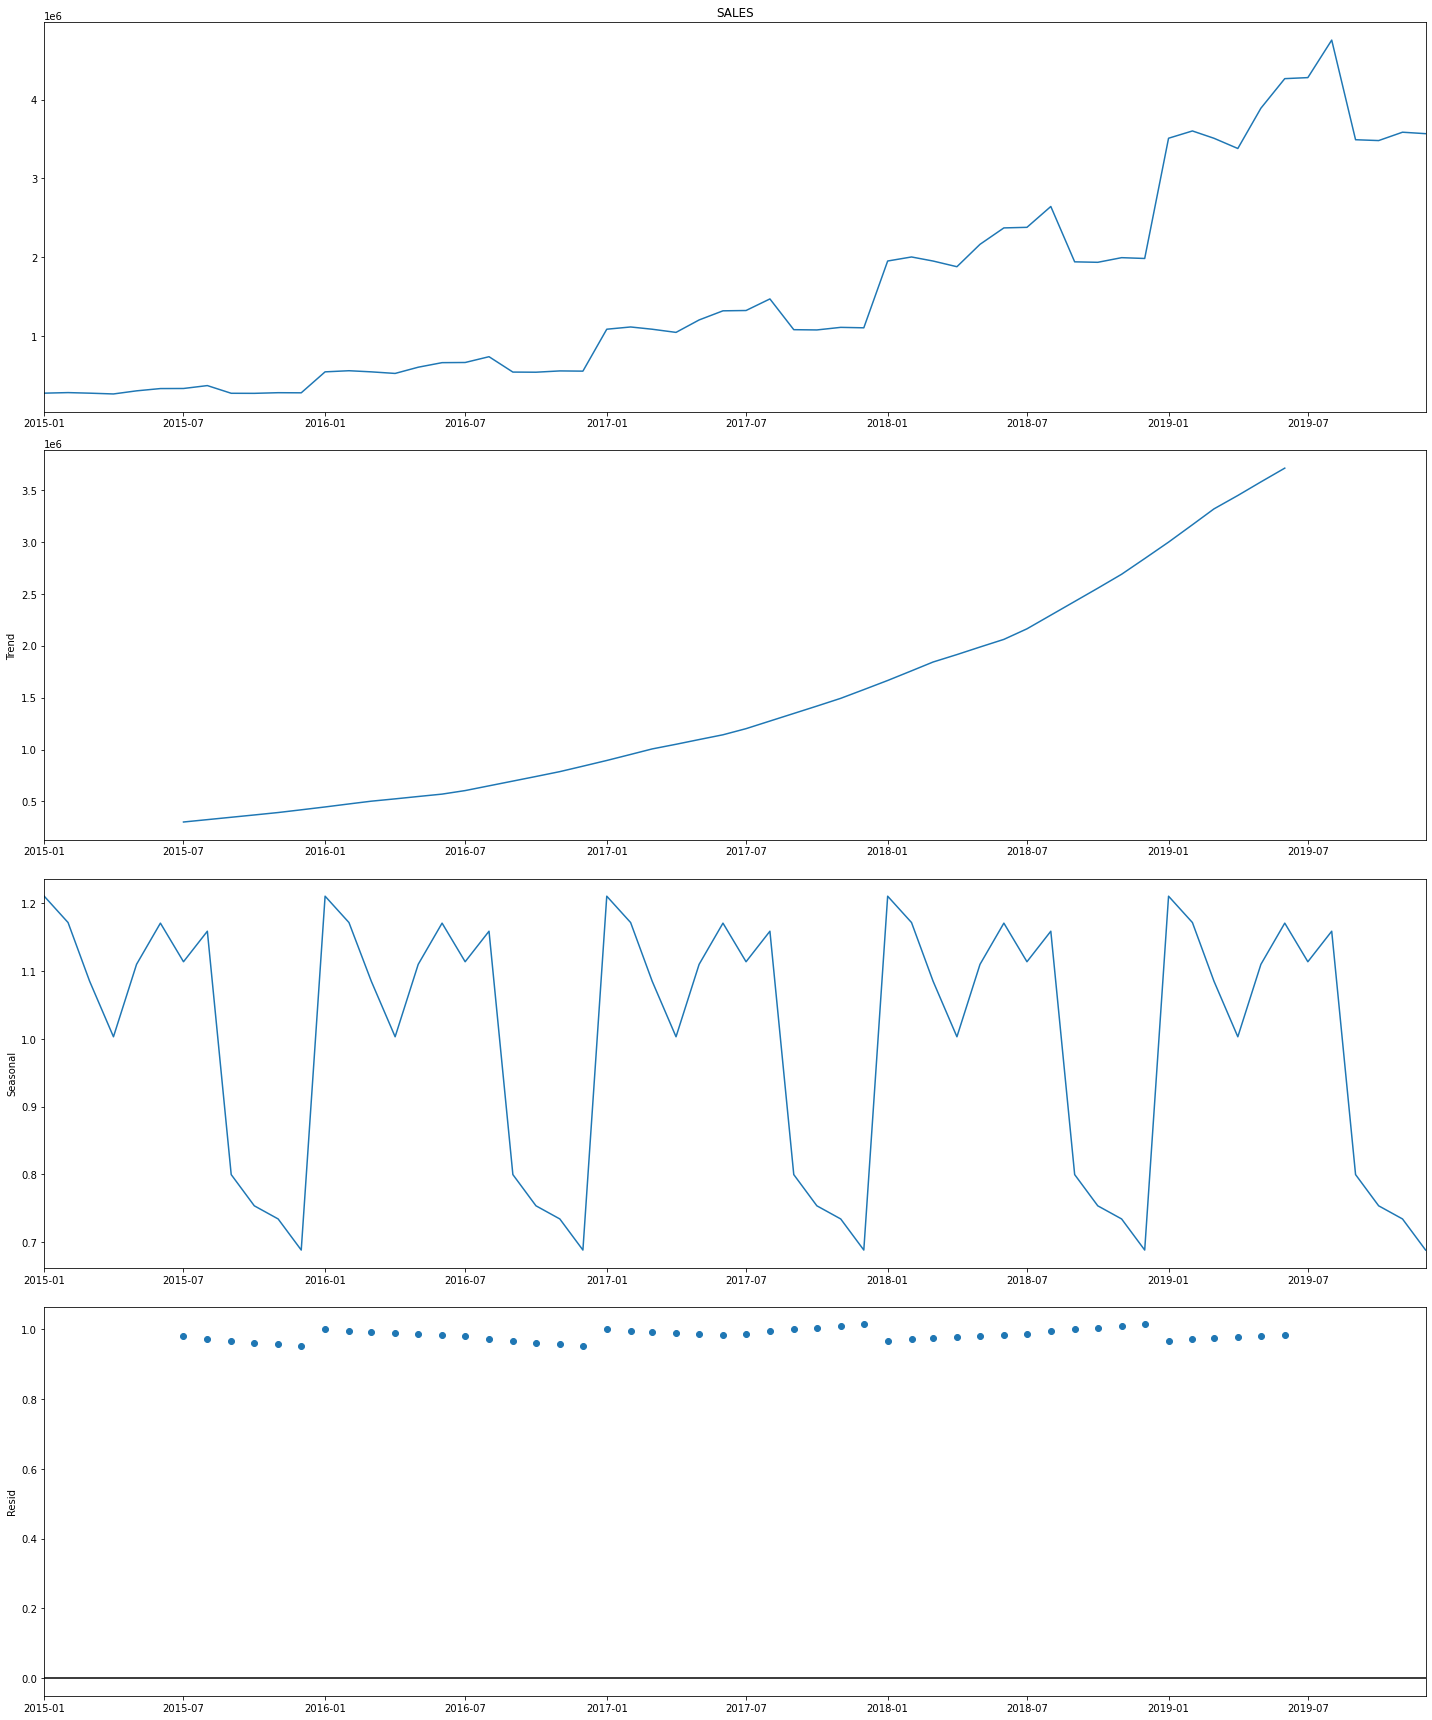

In [12]:
# Multiplicative seasonal decomposition

decomposition = sm.tsa.seasonal_decompose(data.SALES, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [13]:
data.shape

(60, 1)

In [14]:
# Build and evaluate time series forecast
# Split time series data into training and test set

train_len = 36
train = data[0:train_len] # first 36 months or 3 years as training set
test = data[train_len:] # last 24 months or 2 years as out-of-time test set


In [15]:
#Simple time series methods
#1. Naive method

y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['SALES'][train_len-1]

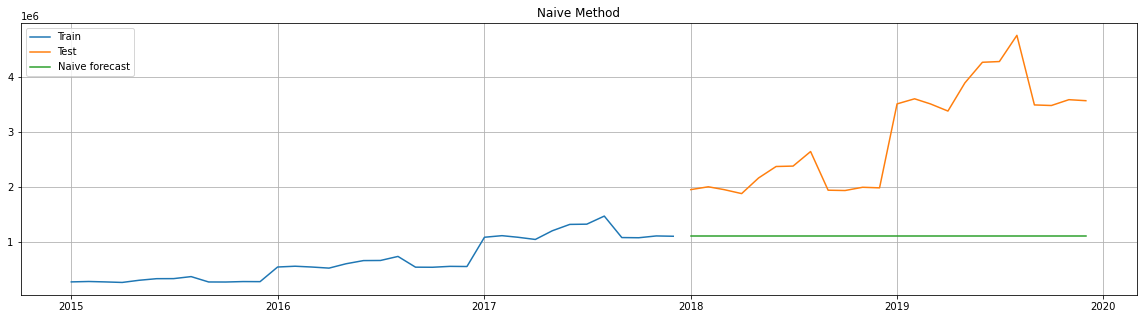

In [16]:
# Plot train, test and forecast

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['SALES'], label='Train')
plt.plot(test['SALES'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [17]:
#Calculate RMSE and MAPE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['SALES'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['SALES']-y_hat_naive['naive_forecast'])/test['SALES'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,2045566.39,58.74


In [18]:
#2. Simple average method

y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['SALES'].mean()


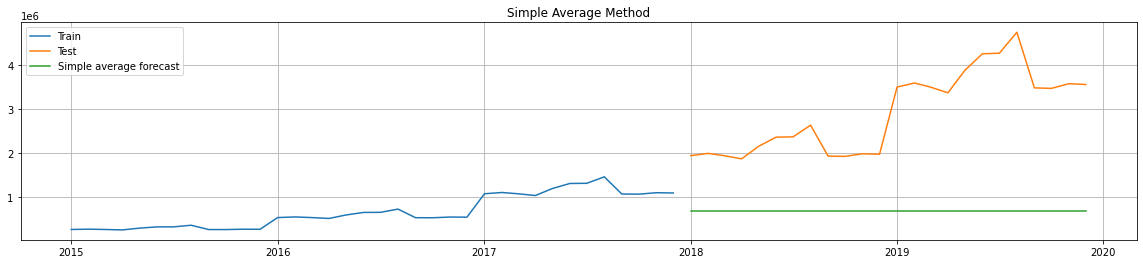

In [19]:
# Plot train, test and forecast

plt.figure(figsize=(20,4))
plt.grid()
plt.plot(train['SALES'], label='Train')
plt.plot(test['SALES'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [20]:
data.isnull().sum()

SALES    0
dtype: int64

In [21]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['SALES'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['SALES']-y_hat_avg['avg_forecast'])/test['SALES'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2045566.39,58.74
0,Simple average method,2430457.95,74.52


In [22]:
#3. Simple moving average method

y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['SALES'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

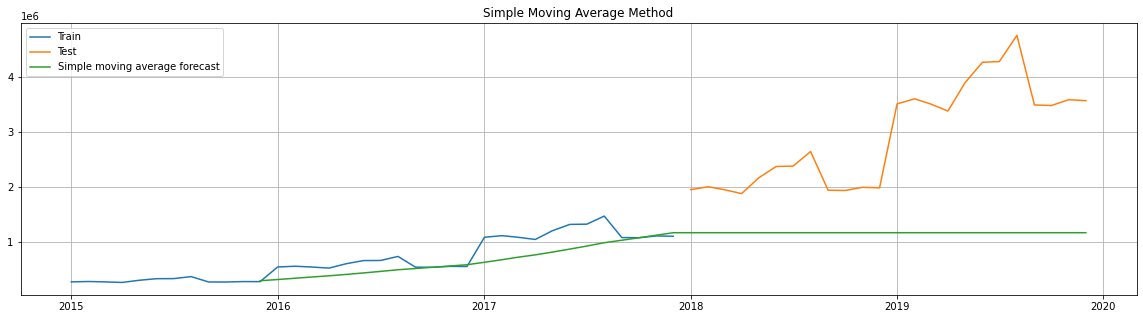

In [23]:
#Plot train, test and forecast

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['SALES'], label='Train')
plt.plot(test['SALES'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()


In [24]:
#Calculate RMSE and MAPE


rmse = np.sqrt(mean_squared_error(test['SALES'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['SALES']-y_hat_sma['sma_forecast'][train_len:])/test['SALES'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,2045566.39,58.74
0,Simple average method,2430457.95,74.52
0,Simple moving average forecast,1987926.60,56.33


In [25]:
# Exponential smoothing methods
# 4. Simple exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['SALES'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


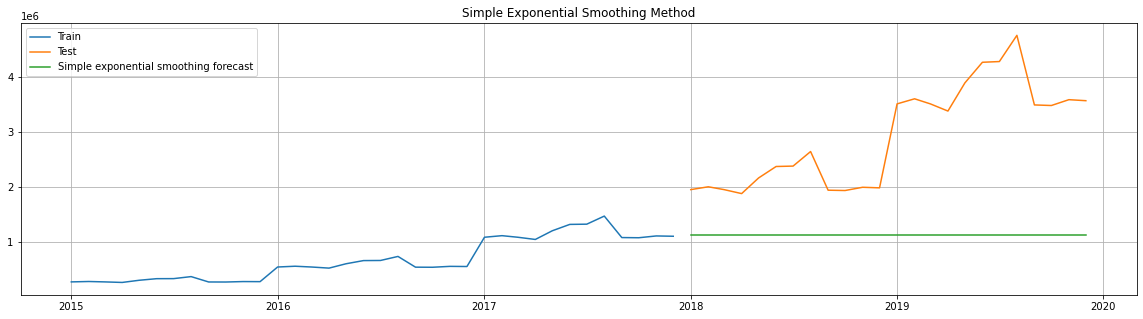

In [26]:
# Plot train, test and forecast

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['SALES'], label='Train')
plt.plot(test['SALES'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [27]:
#Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['SALES'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['SALES']-y_hat_ses['ses_forecast'])/test['SALES'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,2045566.39,58.74
0,Simple average method,2430457.95,74.52
0,Simple moving average forecast,1987926.60,56.33
0,Simple exponential smoothing forecast,2031942.28,58.17


In [28]:
#5. Holt's method with trend

from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['SALES']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))



{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 270696.37474216474, 'initial_slope': 7132.355840845674, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


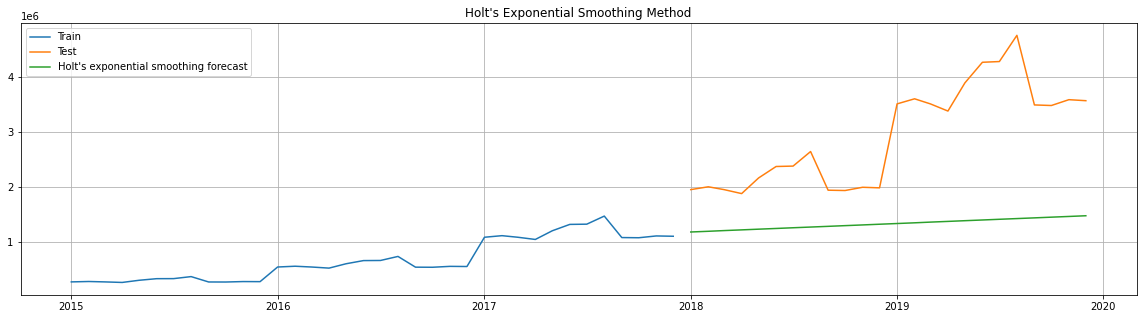

In [29]:
#Plot train, test and forecast

plt.figure(figsize=(20,5))
plt.grid()
plt.plot( train['SALES'], label='Train')
plt.plot(test['SALES'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()


In [30]:
#Calculate RSME and MAPE

rmse = np.sqrt(mean_squared_error(test['SALES'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['SALES']-y_hat_holt['holt_forecast'])/test['SALES'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,2045566.39,58.74
0,Simple average method,2430457.95,74.52
0,Simple moving average forecast,1987926.60,56.33
0,Simple exponential smoothing forecast,2031942.28,58.17
0,Holt's exponential smoothing method,1812183.21,51.14


In [31]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['SALES']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.6842105240991656, 'smoothing_slope': 0.0403445797703567, 'smoothing_seasonal': 0.3157894714675868, 'damping_slope': nan, 'initial_level': 540539.0338284539, 'initial_slope': 18607.07932541846, 'initial_seasons': array([-190142.5485876 , -285481.76338793, -362380.02393888,
       -393761.97167569, -304448.4142587 , -252723.176207  ,
       -260243.30192245, -217791.10185303, -459173.28677167,
       -448605.8138273 , -468882.76268466, -555704.42388937]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


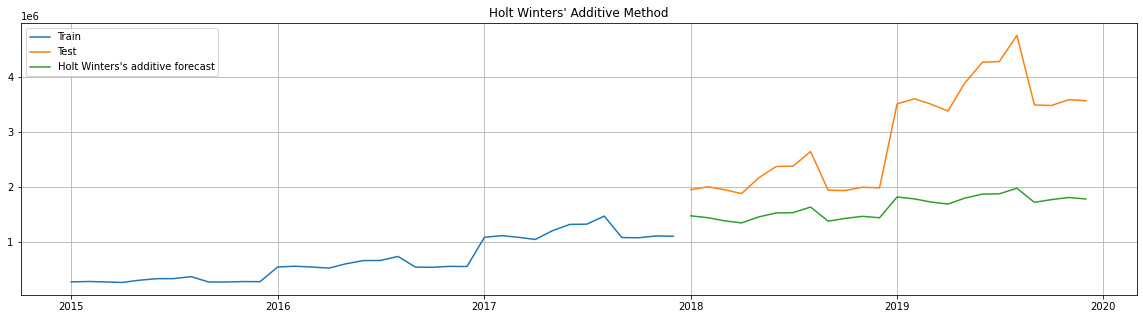

In [32]:
#Plot train, test and forecast

plt.figure(figsize=(20,5))
plt.grid()
plt.plot( train['SALES'], label='Train')
plt.plot(test['SALES'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [33]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['SALES'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['SALES']-y_hat_hwa['hw_forecast'])/test['SALES'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Naive method,2045566.39,58.74
0,Simple average method,2430457.95,74.52
0,Simple moving average forecast,1987926.60,56.33
0,Simple exponential smoothing forecast,2031942.28,58.17
0,Holt's exponential smoothing method,1812183.21,51.14
0,Holt Winters' additive method,1493886.85,41.08


In [34]:
# 7. Holt Winter's multiplicative method with trend and seasonality

y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['SALES']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.789473680365739, 'smoothing_slope': 0.0526315789475418, 'smoothing_seasonal': 0.21052631194479732, 'damping_slope': nan, 'initial_level': 631624.8743983359, 'initial_slope': 24273.891810753918, 'initial_seasons': array([0.57234455, 0.53680293, 0.4879418 , 0.44963246, 0.49928242,
       0.5284272 , 0.51059315, 0.54792702, 0.37659713, 0.35459764,
       0.33669529, 0.28389585]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


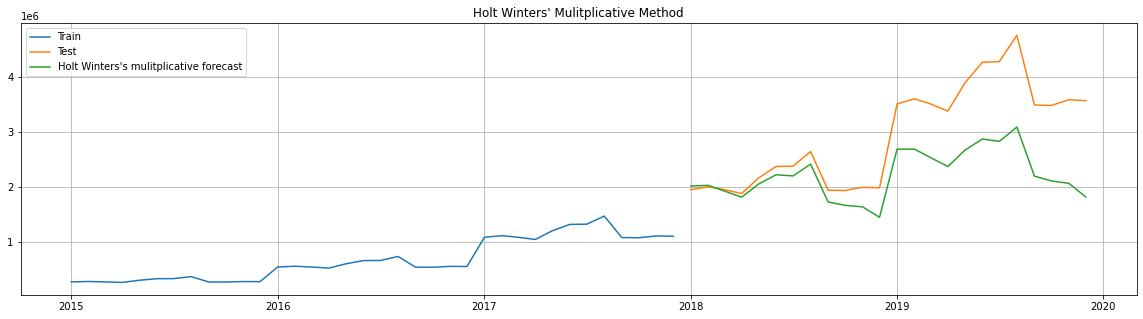

In [35]:
# Plot train, test and forecast

plt.figure(figsize=(20,5))
plt.grid()
plt.plot( train['SALES'], label='Train')
plt.plot(test['SALES'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [36]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['SALES'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['SALES']-y_hat_hwm['hw_forecast'])/test['SALES'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,2045566.39,58.74
0,Simple average method,2430457.95,74.52
0,Simple moving average forecast,1987926.60,56.33
0,Simple exponential smoothing forecast,2031942.28,58.17
0,Holt's exponential smoothing method,1812183.21,51.14
0,Holt Winters' additive method,1493886.85,41.08
0,Holt Winters' multiplicative method,944715.39,21.45


In [37]:

print(" Holt Winters' multiplicative method is the best method identified")
print("for the accurate prediction of sales forecast of 2020 data of Airbnb for time series as it has least RMSE among all")
print("This method takes into account both trend and seasonality while forecasting the 2020 data of Airbnb")

 Holt Winters' multiplicative method is the best method identified
for the accurate prediction of sales forecast of 2020 data of Airbnb for time series as it has least RMSE among all
This method takes into account both trend and seasonality while forecasting the 2020 data of Airbnb


# 